In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("preprocess.csv")

In [3]:
data

Unnamed: 0  UserID  No Of Abuse Report  No Of Rejected Friend Requests  \
0              0       1                  37                             415   
1              1       2                  63                             383   
2              2       3                  10                             151   
3              3       4                  83                              54   
4              4       5                  47                             834   
...          ...     ...                 ...                             ...   
1643        1643      16                  15                             569   
1644        1644     361                  27                              37   
1645        1645     790                   9                             922   
1646        1646     316                   3                               2   
1647        1647     780                  11                             570   

      No Of Freind Requests Thar Are Not Accepted  No Of Friends  \
0                                             204            290   
1                                             542            652   
2                                             244            863   
3                                             604            496   
4                                             326            401   
...                                           ...            ...   
1643                                          268            553   
1644                                          256            451   
1645                                          529             65   
1646                                          201            243   
1647                                          789            840   

      No Of Followers  No Of Likes To Unknown Account  No Of Comments Per Day  \
0                 838                              26                      53   
1                 349                              37                      58   
2                 271                              73                      11   
3                 937                              37                      55   
4                 928                              80                      78   
...               ...                             ...                     ...   
1643              478                               6                      85   
1644              532                              30                      41   
1645              349                              38                      16   
1646              716                               6                      53   
1647              587                              39                      55   

      Fake Or Not Category  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1  
...                    ...  
1643                     0  
1644                     0  
1645                     0  
1646                     0  
1647                     0  

[1648 rows x 10 columns]

In [4]:
data = data.drop(columns = 'Unnamed: 0')

In [5]:
def replace_spaces_with_underscores(data):
    """
    Replaces spaces in column names with underscores in a DataFrame.
    """
    data.columns = [col.replace(' ', '_') for col in data.columns]
    return data

In [6]:
data = replace_spaces_with_underscores(data)

In [7]:
data

UserID  No_Of_Abuse_Report  No_Of_Rejected_Friend_Requests  \
0          1                  37                             415   
1          2                  63                             383   
2          3                  10                             151   
3          4                  83                              54   
4          5                  47                             834   
...      ...                 ...                             ...   
1643      16                  15                             569   
1644     361                  27                              37   
1645     790                   9                             922   
1646     316                   3                               2   
1647     780                  11                             570   

      No_Of_Freind_Requests_Thar_Are_Not_Accepted  No_Of_Friends  \
0                                             204            290   
1                                             542            652   
2                                             244            863   
3                                             604            496   
4                                             326            401   
...                                           ...            ...   
1643                                          268            553   
1644                                          256            451   
1645                                          529             65   
1646                                          201            243   
1647                                          789            840   

      No_Of_Followers  No_Of_Likes_To_Unknown_Account  No_Of_Comments_Per_Day  \
0                 838                              26                      53   
1                 349                              37                      58   
2                 271                              73                      11   
3                 937                              37                      55   
4                 928                              80                      78   
...               ...                             ...                     ...   
1643              478                               6                      85   
1644              532                              30                      41   
1645              349                              38                      16   
1646              716                               6                      53   
1647              587                              39                      55   

      Fake_Or_Not_Category  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1  
...                    ...  
1643                     0  
1644                     0  
1645                     0  
1646                     0  
1647                     0  

[1648 rows x 9 columns]

In [8]:

#data = data.drop(columns = 'UserID')

In [9]:
data.shape

(1648, 9)

In [10]:
data['Fake_Or_Not_Category'].value_counts()

1    824
0    824
Name: Fake_Or_Not_Category, dtype: int64

In [11]:
data.isnull().sum()

UserID                                         0
No_Of_Abuse_Report                             0
No_Of_Rejected_Friend_Requests                 0
No_Of_Freind_Requests_Thar_Are_Not_Accepted    0
No_Of_Friends                                  0
No_Of_Followers                                0
No_Of_Likes_To_Unknown_Account                 0
No_Of_Comments_Per_Day                         0
Fake_Or_Not_Category                           0
dtype: int64

In [12]:
X=data.iloc[:,0:8]
Y=data['Fake_Or_Not_Category']
print(X.shape)
print(Y.shape)

(1648, 8)
(1648,)


In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [14]:
Feature_selection=SelectKBest(score_func=chi2,k=8)
Feature=Feature_selection.fit(X,Y)

In [15]:
Feature

SelectKBest(k=8, score_func=<function chi2 at 0x0000013C79F748B0>)

In [16]:
datascores=pd.DataFrame(Feature.scores_)
datacolumns=pd.DataFrame(X.columns)

In [17]:
Faturescores=pd.concat([datacolumns,datascores],axis=1)
Faturescores.columns=['columns','score']

In [18]:
Faturescores

columns         score
0                                       UserID     31.136091
1                           No_Of_Abuse_Report  19693.791061
2               No_Of_Rejected_Friend_Requests    355.366230
3  No_Of_Freind_Requests_Thar_Are_Not_Accepted     23.690760
4                                No_Of_Friends    325.033373
5                              No_Of_Followers    826.293451
6               No_Of_Likes_To_Unknown_Account   9705.993551
7                       No_Of_Comments_Per_Day    159.746891

In [19]:
print(Faturescores.nlargest(10,'score'))

                                       columns         score
1                           No_Of_Abuse_Report  19693.791061
6               No_Of_Likes_To_Unknown_Account   9705.993551
5                              No_Of_Followers    826.293451
2               No_Of_Rejected_Friend_Requests    355.366230
4                                No_Of_Friends    325.033373
7                       No_Of_Comments_Per_Day    159.746891
0                                       UserID     31.136091
3  No_Of_Freind_Requests_Thar_Are_Not_Accepted     23.690760


In [20]:
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier()
et.fit(X,Y)

ExtraTreesClassifier()

In [21]:
print(et.feature_importances_)

[0.0334911  0.48625353 0.03524437 0.03314933 0.03579626 0.03411741
 0.3003541  0.0415939 ]


<AxesSubplot:>

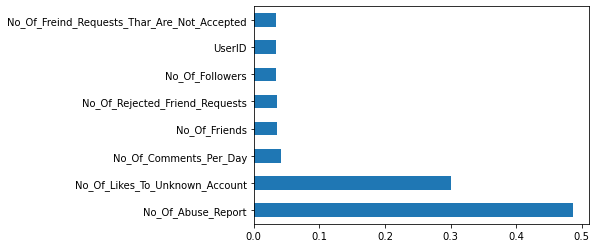

In [22]:
frim=pd.Series(et.feature_importances_,index=X.columns)
frim.nlargest(10).plot(kind='barh')

In [23]:
data = data.drop(columns = 'UserID')
data = data.drop(columns = 'No_Of_Comments_Per_Day')

In [24]:
data

No_Of_Abuse_Report  No_Of_Rejected_Friend_Requests  \
0                     37                             415   
1                     63                             383   
2                     10                             151   
3                     83                              54   
4                     47                             834   
...                  ...                             ...   
1643                  15                             569   
1644                  27                              37   
1645                   9                             922   
1646                   3                               2   
1647                  11                             570   

      No_Of_Freind_Requests_Thar_Are_Not_Accepted  No_Of_Friends  \
0                                             204            290   
1                                             542            652   
2                                             244            863   
3                                             604            496   
4                                             326            401   
...                                           ...            ...   
1643                                          268            553   
1644                                          256            451   
1645                                          529             65   
1646                                          201            243   
1647                                          789            840   

      No_Of_Followers  No_Of_Likes_To_Unknown_Account  Fake_Or_Not_Category  
0                 838                              26                     1  
1                 349                              37                     1  
2                 271                              73                     1  
3                 937                              37                     1  
4                 928                              80                     1  
...               ...                             ...                   ...  
1643              478                               6                     0  
1644              532                              30                     0  
1645              349                              38                     0  
1646              716                               6                     0  
1647              587                              39                     0  

[1648 rows x 7 columns]

In [25]:
X=data.iloc[:,0:6]
Y=data['Fake_Or_Not_Category']

In [26]:
X.shape

(1648, 6)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=111)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1400, 6)
(248, 6)
(1400,)
(248,)


In [29]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train,Y_train)
SVC=svc.score(X_train,Y_train)
test_accuracy = svc.score(X_test, Y_test)
print('Score:{}'.format(test_accuracy))

Score:0.46774193548387094


In [30]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=0.2)
mnb.fit(X_train,Y_train)
MNB=mnb.score(X_train,Y_train)
test_accuracy = mnb.score(X_test, Y_test)
print('Score:{}'.format(test_accuracy))

Score:0.8387096774193549


In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
rfc.fit(X_train,Y_train)
RF=rfc.score(X_train,Y_train)
test_accuracy = rfc.score(X_test, Y_test)
print('Score:{}'.format(test_accuracy))


Score:1.0


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

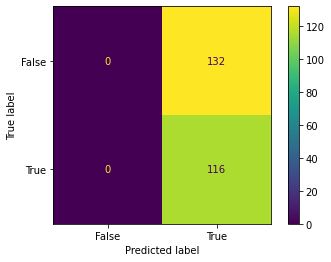

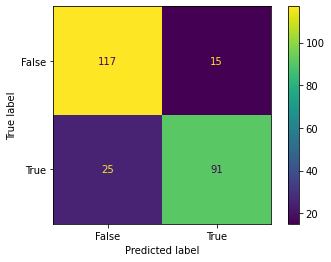

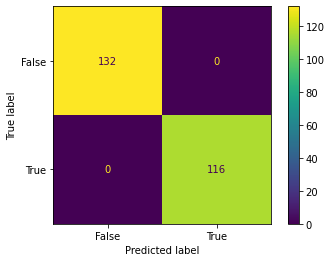

In [33]:

Y_pred = svc.predict(X_test)
confusion_mat = confusion_matrix(Y_test,Y_pred)
trsc = accuracy_score(Y_test,Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
#plt.show()

Y_pred = mnb.predict(X_test)
confusion_mat = confusion_matrix(Y_test,Y_pred)
trsc = accuracy_score(Y_test,Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
#plt.show()


Y_pred = rfc.predict(X_test)
confusion_mat = confusion_matrix(Y_test,Y_pred)
trsc = accuracy_score(Y_test,Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()

In [34]:
data.columns

Index(['No_Of_Abuse_Report', 'No_Of_Rejected_Friend_Requests',
       'No_Of_Freind_Requests_Thar_Are_Not_Accepted', 'No_Of_Friends',
       'No_Of_Followers', 'No_Of_Likes_To_Unknown_Account',
       'Fake_Or_Not_Category'],
      dtype='object')

In [35]:
data

No_Of_Abuse_Report  No_Of_Rejected_Friend_Requests  \
0                     37                             415   
1                     63                             383   
2                     10                             151   
3                     83                              54   
4                     47                             834   
...                  ...                             ...   
1643                  15                             569   
1644                  27                              37   
1645                   9                             922   
1646                   3                               2   
1647                  11                             570   

      No_Of_Freind_Requests_Thar_Are_Not_Accepted  No_Of_Friends  \
0                                             204            290   
1                                             542            652   
2                                             244            863   
3                                             604            496   
4                                             326            401   
...                                           ...            ...   
1643                                          268            553   
1644                                          256            451   
1645                                          529             65   
1646                                          201            243   
1647                                          789            840   

      No_Of_Followers  No_Of_Likes_To_Unknown_Account  Fake_Or_Not_Category  
0                 838                              26                     1  
1                 349                              37                     1  
2                 271                              73                     1  
3                 937                              37                     1  
4                 928                              80                     1  
...               ...                             ...                   ...  
1643              478                               6                     0  
1644              532                              30                     0  
1645              349                              38                     0  
1646              716                               6                     0  
1647              587                              39                     0  

[1648 rows x 7 columns]

In [36]:
import joblib
joblib.dump(rfc,"./model.pkl")

['./model.pkl']

In [37]:
model=joblib.load("./model.pkl")